# Names: Lara Mechling, Corrina Hanson, Isaac Liem
## Date: 9/15/2022
## Course: DSC 450

# Title: Predicting Health Insurance Premiums

### Lara Mechling - Data Wrangler

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# import dataset

insurance= pd.read_csv('insurance.csv')

In [3]:
# view dataset

insurance.sample(10)

age     sex     bmi  children smoker     region      charges
1011   43    male  20.130         2    yes  southeast  18767.73770
131    61  female  22.040         0     no  northeast  13616.35860
105    20    male  28.025         1    yes  northwest  17560.37975
816    24  female  24.225         0     no  northwest   2842.76075
679    49  female  23.180         2     no  northwest  10156.78320
1138   33    male  30.250         0     no  southeast   3704.35450
1064   29  female  25.600         4     no  southwest   5708.86700
564    18  female  32.120         2     no  southeast   2801.25880
578    52    male  30.200         1     no  southwest   9724.53000
1218   46  female  34.600         1    yes  southwest  41661.60200

In [4]:
# information on dataset

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# categorize features

num_features= ['age', 'bmi', 'charges']
cat_features= ['sex', 'children', 'smoker', 'region']

In [6]:
# numerical features histograms

'''
Hands On Predictive Analytics with Python
Alvaro Fuentes
'''

def desc_num_feature(feature_name, bins= 30, edgecolor= 'k', **kwargs):
    fig, ax= plt.subplots(figsize= (8, 4))
    insurance[feature_name].hist(bins= bins, edgecolor= edgecolor, ax= ax, **kwargs)
    ax.set_title(feature_name, size= 15)
    plt.figtext(1, 0.15, str(insurance[feature_name].describe().round(2)), size= 17)

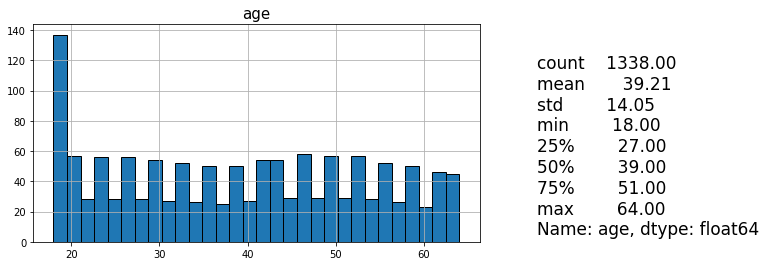

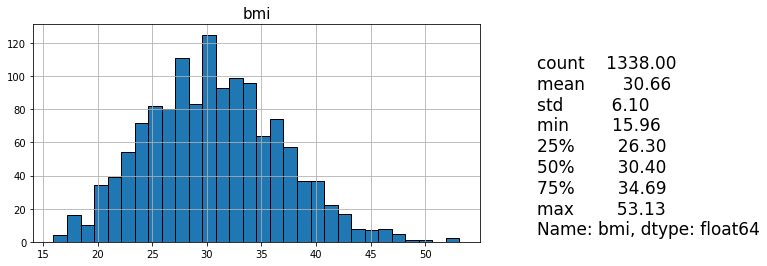

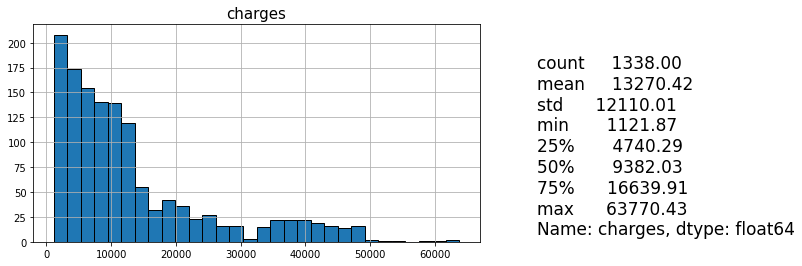

In [7]:
# view histograms for numerical features

for column in num_features:
    desc_num_feature(column)

In [8]:
# categorical feature bar graphs

'''
Hands On Predictive Analytics with Python
Alvaro Fuentes
'''

def cat_feature_bar_chart(feature):
    count= insurance[feature].value_counts()
    percent= 100 * insurance[feature].value_counts(normalize= True)
    df= pd.DataFrame({'count': count, 'percent': percent.round(1)})
    print(df)
    count.plot(kind= 'bar', title= feature)

        count  percent
male      676     50.5
female    662     49.5


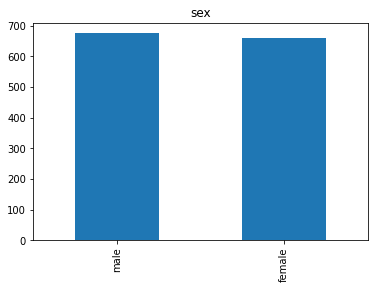

In [9]:
# view categoical bar charts

cat_feature_bar_chart('sex')    

   count  percent
0    574     42.9
1    324     24.2
2    240     17.9
3    157     11.7
4     25      1.9
5     18      1.3


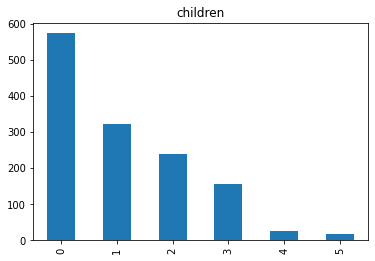

In [10]:
cat_feature_bar_chart('children')   

     count  percent
no    1064     79.5
yes    274     20.5


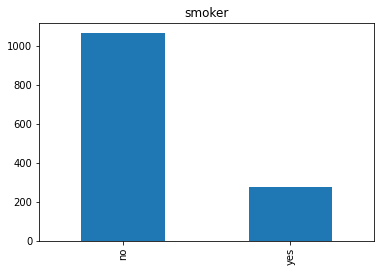

In [11]:
cat_feature_bar_chart('smoker')   

           count  percent
southeast    364     27.2
southwest    325     24.3
northwest    325     24.3
northeast    324     24.2


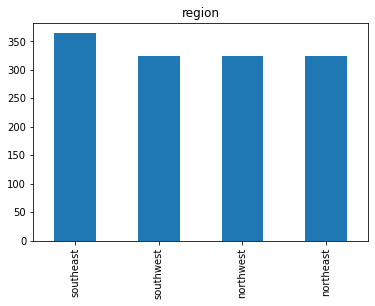

In [12]:
cat_feature_bar_chart('region')   

In [56]:
# Profiling report

pandas_profiling.ProfileReport(insurance)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# one hot encoding for categorical values

sex= pd.get_dummies(insurance.sex, prefix= 'sex')
smoker= pd.get_dummies(insurance.smoker, prefix= 'smoker')
region= pd.get_dummies(insurance.region, prefix= 'region')

In [14]:
# combine datasets

insurance = pd.concat([insurance, sex, smoker, region], axis= 1)

In [15]:
# view data

insurance.sample(10)

age     sex     bmi  children smoker     region      charges  \
674    44  female  43.890         2    yes  southeast  46200.98510   
166    20  female  37.000         5     no  southwest   4830.63000   
493    61    male  43.400         0     no  southwest  12574.04900   
1187   62  female  32.680         0     no  northwest  13844.79720   
414    19  female  35.150         0     no  northwest   2134.90150   
335    64    male  34.500         0     no  southwest  13822.80300   
66     61  female  39.100         2     no  southwest  14235.07200   
905    26  female  29.355         2     no  northeast   4564.19145   
176    38    male  27.835         2     no  northwest   6455.86265   
241    33  female  22.135         1     no  northeast   5354.07465   

      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
674            1         0          0           1                 0   
166            1         0          1           0                 0   
493            0         1          1           0                 0   
1187           1         0          1           0                 0   
414            1         0          1           0                 0   
335            0         1          1           0                 0   
66             1         0          1           0                 0   
905            1         0          1           0                 1   
176            0         1          1           0                 0   
241            1         0          1           0                 1   

      region_northwest  region_southeast  region_southwest  
674                  0                 1                 0  
166                  0                 0                 1  
493                  0                 0                 1  
1187                 1                 0                 0  
414                  1                 0                 0  
335                  0                 0                 1  
66                   0                 0                 1  
905                  0                 0                 0  
176                  1                 0                 0  
241                  0                 0                 0

In [16]:
# drop unnedded columns

insurance= insurance.drop('sex', axis= 1)
insurance= insurance.drop('smoker', axis= 1)
insurance= insurance.drop('region', axis= 1)

In [17]:
# view finished dataset

insurance.sample(10)

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
32    19  28.600         5   4687.79700           1         0          1   
754   24  33.630         4  17128.42608           0         1          1   
865   40  29.900         2   6600.36100           0         1          1   
140   34  22.420         2  27375.90478           0         1          1   
412   26  17.195         2  14455.64405           1         0          0   
985   44  25.800         1   7624.63000           1         0          1   
35    19  20.425         0   1625.43375           0         1          1   
290   28  33.400         0   3172.01800           1         0          1   
566   38  40.565         1   6373.55735           1         0          1   
67    40  26.315         1   6389.37785           0         1          1   

     smoker_yes  region_northeast  region_northwest  region_southeast  \
32            0                 0                 0                 0   
754           0                 1                 0                 0   
865           0                 0                 0                 0   
140           0                 1                 0                 0   
412           1                 1                 0                 0   
985           0                 0                 0                 0   
35            0                 0                 1                 0   
290           0                 0                 0                 0   
566           0                 0                 1                 0   
67            0                 0                 1                 0   

     region_southwest  
32                  1  
754                 0  
865                 1  
140                 0  
412                 0  
985                 1  
35                  0  
290                 1  
566                 0  
67                  0

In [18]:
# min max scaling of numeric columns

num_features= ['age', 'bmi', 'children']

scaler= MinMaxScaler()

In [19]:
scaler.fit(insurance[num_features])

MinMaxScaler()

In [20]:
insurance.loc[:, num_features]= scaler.transform(insurance[num_features])

In [21]:
insurance.sample(10)

age       bmi  children      charges  sex_female  sex_male  \
393   0.673913  0.414044       0.2   9290.13950           0         1   
579   0.152174  0.201910       0.0   3206.49135           1         0   
477   0.152174  0.529056       0.0   2534.39375           0         1   
1270  0.173913  0.483051       0.2   3292.52985           0         1   
767   0.521739  0.350821       0.2   7050.64200           1         0   
1210  0.391304  0.401264       0.2   5373.36425           0         1   
626   0.391304  0.347592       0.6   6748.59120           0         1   
1208  0.413043  0.258138       0.2  20296.86345           1         0   
1219  0.434783  0.383374       0.6   7537.16390           1         0   
506   0.086957  0.414044       0.2   2643.26850           0         1   

      smoker_no  smoker_yes  region_northeast  region_northwest  \
393           1           0                 1                 0   
579           1           0                 1                 0   
477           1           0                 0                 1   
1270          1           0                 0                 1   
767           1           0                 0                 0   
1210          1           0                 0                 1   
626           1           0                 1                 0   
1208          0           1                 1                 0   
1219          1           0                 0                 1   
506           1           0                 0                 1   

      region_southeast  region_southwest  
393                  0                 0  
579                  0                 0  
477                  0                 0  
1270                 0                 0  
767                  0                 1  
1210                 0                 0  
626                  0                 0  
1208                 0                 0  
1219                 0                 0  
506                  0                 0

In [22]:
insurance.describe()

age          bmi     children       charges   sex_female  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean      0.461022     0.395572     0.218984  13270.422265     0.494768   
std       0.305434     0.164062     0.241099  12110.011237     0.500160   
min       0.000000     0.000000     0.000000   1121.873900     0.000000   
25%       0.195652     0.278080     0.000000   4740.287150     0.000000   
50%       0.456522     0.388485     0.200000   9382.033000     0.000000   
75%       0.717391     0.504002     0.400000  16639.912515     1.000000   
max       1.000000     1.000000     1.000000  63770.428010     1.000000   

          sex_male    smoker_no   smoker_yes  region_northeast  \
count  1338.000000  1338.000000  1338.000000       1338.000000   
mean      0.505232     0.795217     0.204783          0.242152   
std       0.500160     0.403694     0.403694          0.428546   
min       0.000000     0.000000     0.000000          0.000000   
25%       0.000000     1.000000     0.000000          0.000000   
50%       1.000000     1.000000     0.000000          0.000000   
75%       1.000000     1.000000     0.000000          0.000000   
max       1.000000     1.000000     1.000000          1.000000   

       region_northwest  region_southeast  region_southwest  
count       1338.000000       1338.000000       1338.000000  
mean           0.242900          0.272048          0.242900  
std            0.428995          0.445181          0.428995  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000  
50%            0.000000          0.000000          0.000000  
75%            0.000000          1.000000          0.000000  
max            1.000000          1.000000          1.000000

# Isaac Liem - Modeler

In [23]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Set my predictor field and my features
X = insurance.drop(['charges'], axis=1)
y = insurance.charges
# Train-test-split function to retain 40% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# Instantiate the model and fit the training data
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [24]:
# Calculate weights or coefficients of the linear model
pd.Series(reg.coef_, index=X_train.columns).sort_values(ascending=False)

smoker_yes          7.251810e+16
smoker_no           7.251810e+16
bmi                 1.268353e+04
age                 1.162991e+04
children            2.596428e+03
sex_male           -1.434257e+16
sex_female         -1.434257e+16
region_northwest   -5.276846e+17
region_northeast   -5.276846e+17
region_southwest   -5.276846e+17
region_southeast   -5.276846e+17
dtype: float64

In [25]:
# Predict on the train data and get the accuracy
reg_predict_train = reg.predict(X_train)
coef_of_determine_train = r2_score(y_train, reg_predict_train)
print("Training Coefficient of Determination is {:.2%}".format(coef_of_determine_train))

Training Coefficient of Determination is 72.15%


In [26]:
# Predict on the test data and get the accuracy
reg_predict_test = reg.predict(X_test)
coef_of_determine_test = r2_score(y_test, reg_predict_test)
print("Testing Coefficient of Determination is {:.2%}".format(coef_of_determine_test))

Testing Coefficient of Determination is 78.72%


In [27]:
# Find MSE for training data
mse = mean_squared_error(y_true=y_test, y_pred=reg_predict_test)
print("Mean Square Error is", round(mse, 0))

Mean Square Error is 32940508.0


In [28]:
mae = mean_absolute_error(y_true=y_test, y_pred=reg_predict_test)
print("Mean Absolute Error is", round(mae, 0))

Mean Absolute Error is 4061.0


In [29]:
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=reg_predict_test)
print("Mean Absolute Percentage Error is {:.2%}".format(mape))

Mean Absolute Percentage Error is 42.46%


# Corrina Hanson - Visualizer

In [85]:
df = pd.read_csv('insurance.csv')

In [57]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

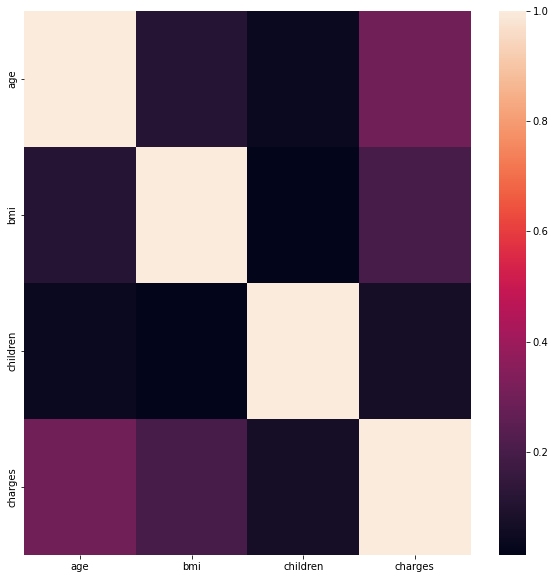

In [53]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr())

In [32]:
new = df.corr()
new

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

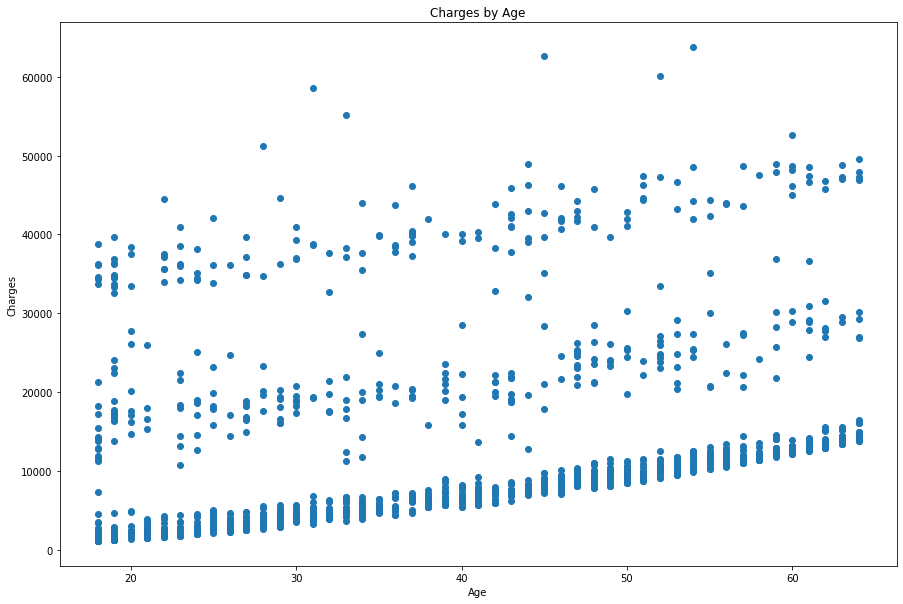

In [41]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.scatter(df.age, df.charges)
plt.title('Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show()

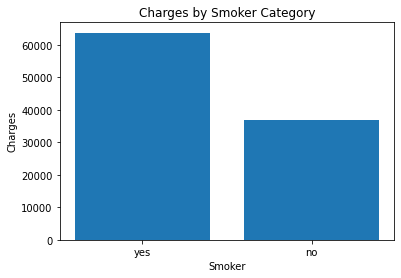

In [34]:
plt.bar(df.smoker, df.charges)
plt.title('Charges by Smoker Category')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

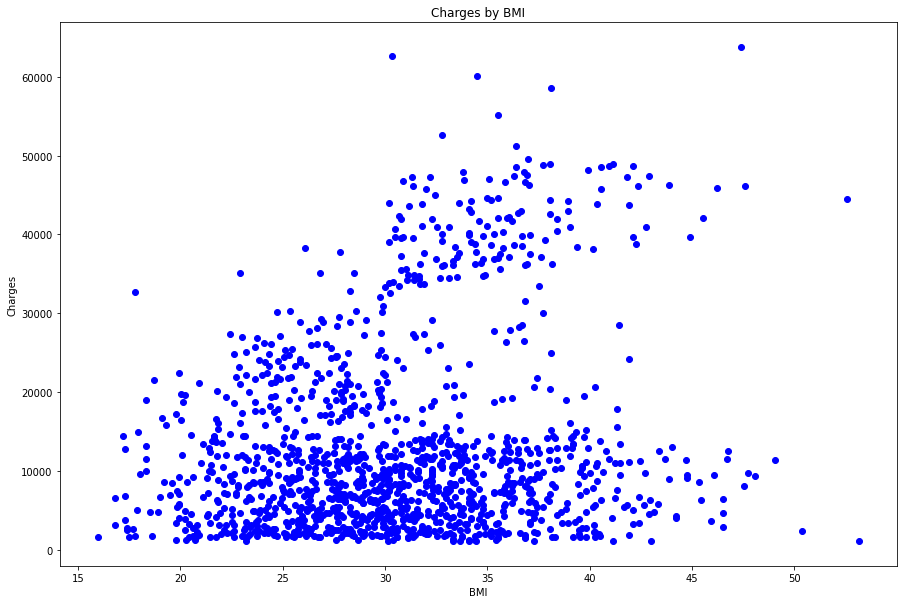

In [74]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.scatter(df.bmi, df.charges, color = 'blue')
plt.title('Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

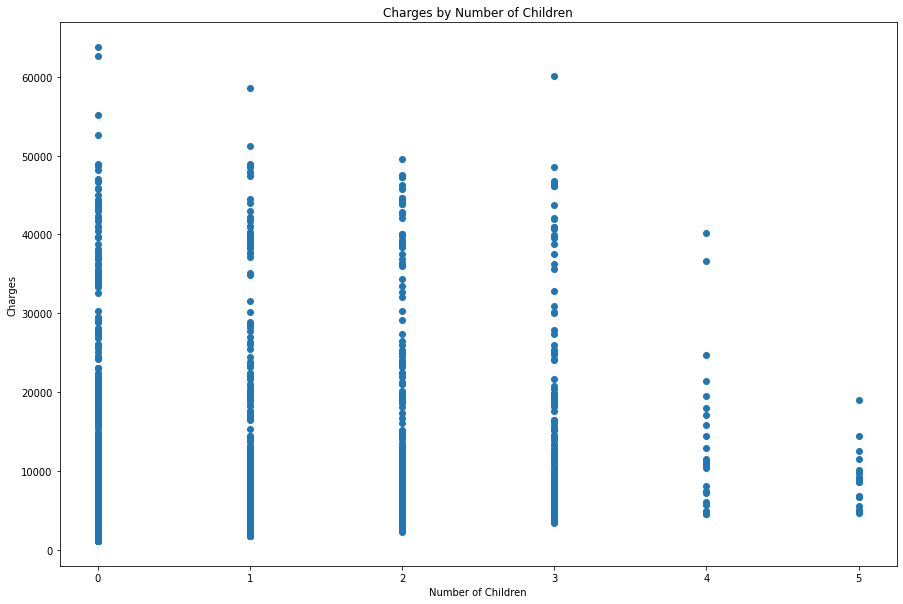

In [50]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.scatter(df.children, df.charges)
plt.title('Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

In [49]:
#len(y_test), len(reg_predict_test)

results = pd.DataFrame({'Actual':y_test, 'Predicted':reg_predict_test})
results

Actual  Predicted
578    9724.53000    11392.0
610    8547.69130     9600.0
569   45702.02235    37696.0
1034  12950.07120    16384.0
198    9644.25250     6848.0
...           ...        ...
651   10579.71100    14592.0
523    5397.61670     9600.0
495    1967.02270     2432.0
781    1146.79660     5760.0
581    1639.56310     3072.0

[536 rows x 2 columns]

<AxesSubplot:xlabel='charges'>

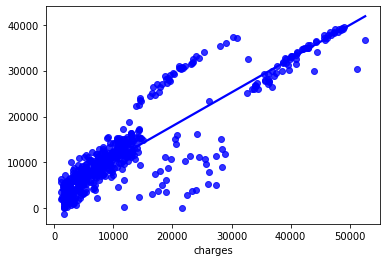

In [54]:
sns.regplot(x = y_test, y = reg_predict_test, ci = None, color = 'b')

# sns.regplot(x = y_test, y = reg_predict_test, ci = None, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})

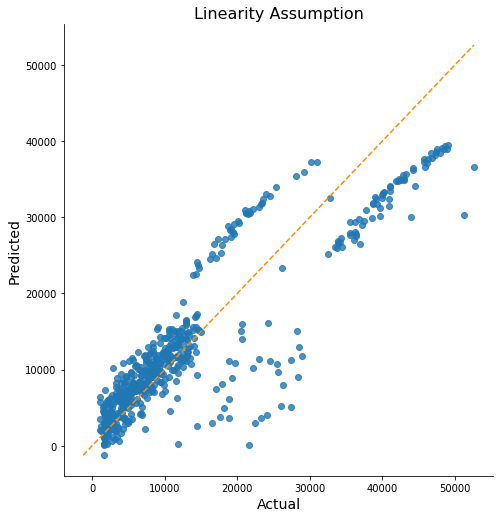

In [62]:
sns.lmplot(x='Actual', y='Predicted', data = results, fit_reg=False, height = 7)
    
# Plotting the diagonal line
line_coords = np.arange(results[['Actual', 'Predicted']].min().min()-10, 
                        results[['Actual', 'Predicted']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted', fontsize=14)
plt.xlabel('Actual', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

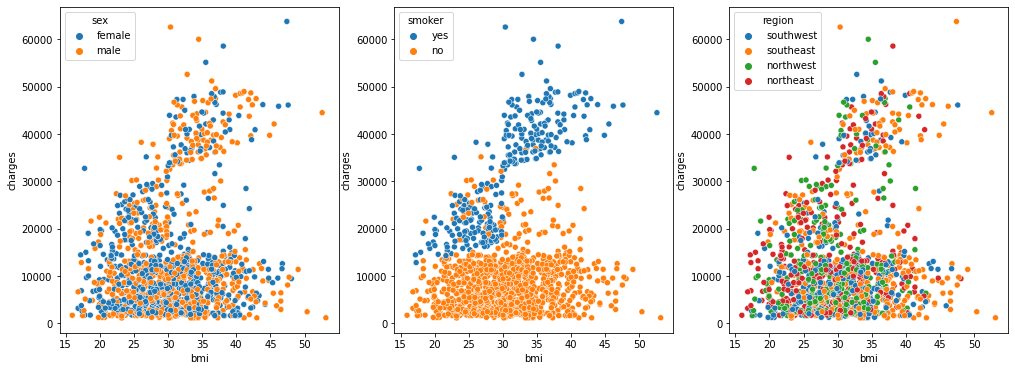

In [84]:
fig, axes = plt.subplots(ncols = 3, figsize = (17,6), squeeze=True)
sns.scatterplot(x='bmi', y='charges', ax=axes[0], data=df,hue='sex')
sns.scatterplot(x='bmi', y='charges', ax=axes[1], data=df,hue='smoker')
sns.scatterplot(x='bmi', y='charges', ax=axes[2], data=df,hue='region')